---
title: "Naive Bayes"
format: html
---

# Introduction to Naive Bayes

Naive Bayes is a supervised machine learning algorithm used for classification tasks. The algorithm is rooted in Bayes Theorem in that it is based on the probability of a hypothesis, given data and prior knowledge. Below is the equation the Naive Bayes Algorithm uses.

[![Bayes' Theorem](./images/Bayes_rule.png "Bayes' Theorem")](https://www.saedsayad.com/naive_bayesian.htm)

Where P(c|x)= The probability of the target variable class given the features <br>
P(x|c)= The probability of the features given the class <br>
and P(c), P(x) are the prior probabilties of the target variable class and features.

The algorithm estimates the probability of each class for a given data point and assign the class with the highest probability to the data point. It assumes that all features are independent of each other; this is usually not the case in the real world but the algorithm still provides accurate predictions. Ultimately, through Naive Bayes you want to achieve accurate classifications given the algorithm is given data with a set of variables. In my case, I would like to predict if a certain state's home value will increase substantially in a certain year based on census data. Different variants of Naive Bayes are used for different applications. Multinomial Naive Bayes is used for word counts and frequency analysis (discrete data). Gaussian Naive Bayes is used for numeric data that is approximately normally distributed and independent. Bernoulli Naive Bayes is used for binary data, like if a word appears in a document or not.

# Prepare Data for Naive Bayes

Currently my explanatory variable is continuious. I must change it to a label variable. To do this, I will choose home value percent changes that are above the mean to 1s, home value percent changes that are below the mean below the mean to 0s.

In [20]:
import pandas as pd
record=pd.read_csv('data/RecordData.csv')
mean=record['Typical Home Value'].mean()
record['Typical Home Value']=record['Typical Home Value'].apply(lambda x:1 if x>mean else 0)
record=record.drop(['Year','RegionName'],axis=1)

In [22]:
record.head()

,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Mean Rent Paid,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.047111,0
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.036934,0
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.082710,1
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,-0.125037,0
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.026241,0


# Feature Selection

The text data was not very relevant to my project and something happened to my text data, so the code below does not work properly and produce a result that makes sense. It was not worth it to remedy the issue.

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import numpy as np
import matplotlib.pyplot as plt
text=pd.read_csv('./data/news.csv')
text['score'] = text['2'].apply(lambda x: sid.polarity_scores(x))
text['score'] = text['score'].apply(lambda x: x['compound']).astype(float)
text['score'].mean()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\npeno\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Will say if title is above mean it is positive/neutral, below mean negative.

In [23]:
titles=[]
y=[]
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,text.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in text["2"][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    titles.append(tmp)
    if(text["score"][i]<=text['score'].mean()):
        y.append(0)
    if(text["score"][i]>=text['score'].mean()):
        y.append(1)
y=np.array(y)
from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(titles,MAX_FEATURES=10000)
vocab1 = dict([(value, key) for key, value in vocab0.items()])
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1
df2.columns = range(df2.columns.size)
x=df2.to_numpy()
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
#partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
#partial_grid_search(num_runs=20, min_index=1000, max_index=10000)
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

[12, 73, 44, 63, 78, 72, 70, 8, 86, 5]
[62, 40, 66, 60, 65, 83, 71, 9, 80, 59]


# Naive Bayes with Labeled Record Data

Now I will perform the Naive Bayes algorithm on my now labeled record data.

To avoid overfitting, it is imperative that I split my data into a training and testing set. The training set will allow my model to learn the relationships in the data, while the testing set will prevent the model from just "memorizing" the training data, as it has to perform well on new data it has not seen before. This balance between bias and variance is key in machine learning.

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        43
           1       0.51      1.00      0.68        19

    accuracy                           0.71        62
   macro avg       0.76      0.79      0.71        62
weighted avg       0.85      0.71      0.72        62



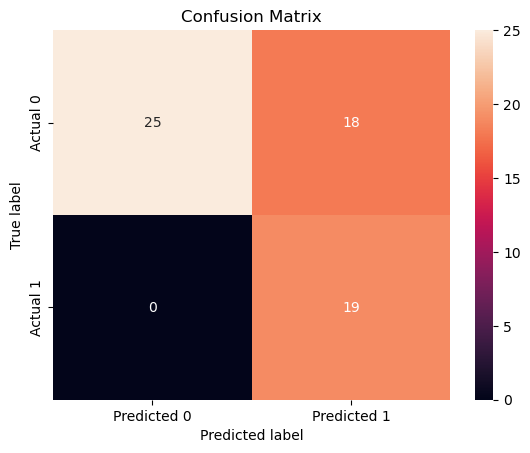

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
X=record.drop(['Typical Home Value'],axis=1)
y=record['Typical Home Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred=naive.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True,)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Predicting the most frequent class:

In [36]:
y_test.value_counts()
43/(43+19)

0.6935483870967742

Accuracy on training data:

In [43]:
y_pred_train=naive.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.6338028169014085

Overall, this model performs poorly. As you can see, it barley performs better than if you were to pick the most frequent class. Furthermore, the training accuracy is very low. This tells us there is some underfitting going on, meaning the bias is high. While Naive Bayes has its uses, for the purposes of my project I will be moving on to other supervised and unsupervised learning methods to hopefully create a model that produces meaningful results.

# Naive Bayes with Labeled Text Data

The text data was not very relevant to my project and something happened to my text data, so the code below does not work properly and produce a result that makes sense. It was not worth it to remedy the issue.

In [44]:
def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100


We have 100 percent accuracy on training set and 70 percent accuracy on the test set, so overall not a bad model.